In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import platform
platform_sys = platform.uname()[0]

if platform_sys == "Windows":
    data_path = 'C:/Users/Li Hang/OneDrive - CivilEng/8_Desktop/Wind Farm Measurement/府谷项目/FUGU001#22_23.csv'
elif platform_sys == "Darwin":
    data_path = '/Users/forestriveral/Documents/OneDrive - CivilEng/8_Desktop/Wind Farm Measurement/府谷项目/FUGU001#22_23.csv'

data_path

'/Users/forestriveral/Documents/OneDrive - CivilEng/8_Desktop/Wind Farm Measurement/府谷项目/FUGU001#22_23.csv'

In [3]:
scada_data = pd.read_csv(data_path, low_memory=False)
scada_data

,dt,flag,WecAlmRst_boolean,WecEmeRst_boolean,WecRmtRst_boolean,TowDrAlmEn_boolean,CnvToggle_boolean,CnvWEn_boolean,CnvVArEn_boolean,WecManReq_boolean,...,WecNtfB1_float,WecNtfB2_float,WecWh400Set_float,WecVAr400Set_float,WecExpWh400Set_float,WecSt_int,WecWDem_float,WecVArDem_float,Unnamed: 512,Unnamed: 513
0,3/22/2022 0:00,1,0,0,0,1,1,0,0,0,...,0.57,0.27,0.0,0.0,0,0,4050,0,NaN,NaN
1,3/22/2022 0:00,1,0,0,0,1,1,0,0,0,...,0.57,0.27,0.0,0.0,0,0,4050,0,NaN,NaN
2,3/22/2022 0:00,1,0,0,0,1,1,0,0,0,...,0.57,0.27,0.0,0.0,0,0,4050,0,NaN,NaN
3,3/22/2022 0:00,1,0,0,0,1,1,0,0,0,...,0.57,0.27,0.0,0.0,0,0,4050,0,NaN,NaN
4,3/22/2022 0:00,1,0,0,0,1,1,0,0,0,...,0.57,0.27,0.0,0.0,0,0,4050,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99625,3/23/2022 23:59,1,0,0,0,1,1,0,0,0,...,0.57,0.27,0.0,0.0,0,0,4050,0,NaN,NaN
99626,3/23/2022 23:59,1,0,0,0,1,0,0,0,0,...,0.57,0.27,0.0,0.0,0,0,4050,0,NaN,NaN
99627,3/23/2022 23:59,1,0,0,0,1,1,0,0,0,...,0.57,0.27,0.0,0.0,0,0,4050,0,NaN,NaN
99628,3/23/2022 23:59,1,0,0,0,1,1,0,0,0,...,0.57,0.27,0.0,0.0,0,0,4050,0,NaN,NaN


In [4]:
scada_group = scada_data.groupby('dt')
scada_group

In [5]:
first_group = list(scada_group)[0]
first_group[0]

'3/22/2022 0:00'

In [6]:
first_group[1].shape

(60, 514)

In [7]:
len(list(scada_group))

1661

In [8]:
data_info = [[tp, data.shape] for tp, data in list(scada_group)]
data_info = pd.DataFrame(data_info, columns=['dt', 'shape']).sort_values(by=['dt'])
data_info

,dt,shape
0,3/22/2022 0:00,"(60, 514)"
1,3/22/2022 0:02,"(59, 514)"
2,3/22/2022 0:03,"(60, 514)"
3,3/22/2022 0:04,"(60, 514)"
4,3/22/2022 0:05,"(60, 514)"
...,...,...
1656,3/23/2022 9:55,"(60, 514)"
1657,3/23/2022 9:56,"(60, 514)"
1658,3/23/2022 9:57,"(60, 514)"
1659,3/23/2022 9:58,"(60, 514)"


In [9]:
# data_info['dt']
tp_3_22 = data_info[data_info['dt'].str.contains('3/22/2022')]
tp_3_22

,dt,shape
0,3/22/2022 0:00,"(60, 514)"
1,3/22/2022 0:02,"(59, 514)"
2,3/22/2022 0:03,"(60, 514)"
3,3/22/2022 0:04,"(60, 514)"
4,3/22/2022 0:05,"(60, 514)"
...,...,...
217,3/22/2022 23:55,"(60, 514)"
218,3/22/2022 23:56,"(60, 514)"
219,3/22/2022 23:57,"(60, 514)"
220,3/22/2022 23:58,"(60, 514)"


In [10]:
tp_3_23 = data_info[data_info['dt'].str.contains('3/23/2022')]
tp_3_23

,dt,shape
222,3/23/2022 0:01,"(60, 514)"
223,3/23/2022 0:02,"(60, 514)"
224,3/23/2022 0:03,"(60, 514)"
225,3/23/2022 0:04,"(60, 514)"
226,3/23/2022 0:05,"(60, 514)"
...,...,...
1656,3/23/2022 9:55,"(60, 514)"
1657,3/23/2022 9:56,"(60, 514)"
1658,3/23/2022 9:57,"(60, 514)"
1659,3/23/2022 9:58,"(60, 514)"


Lost time:  0:01
Lost time:  0:09 - 20:25


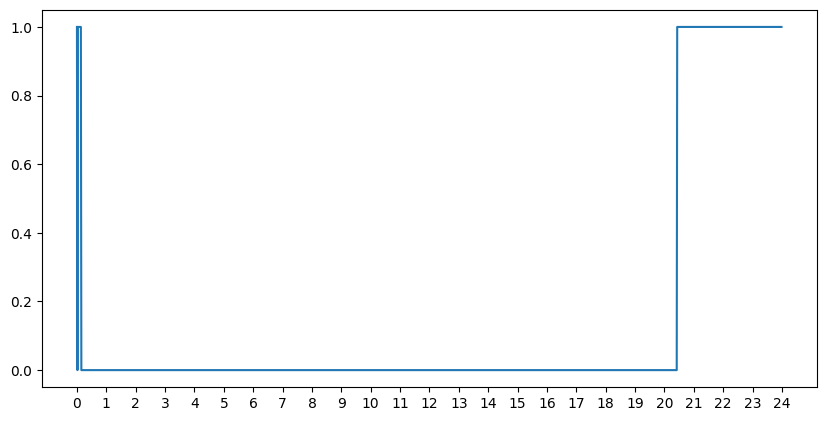

Lost time:  0:00


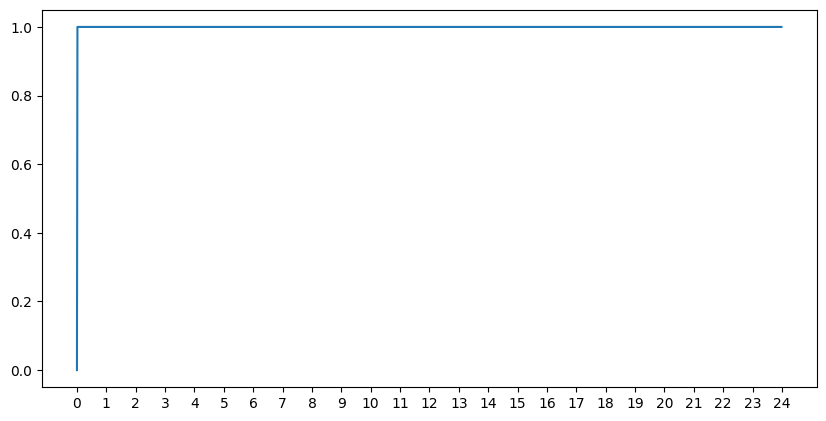

In [11]:
def data_time_point_check(time_points):
    # the number of time points = 60 * 24 = 1440
    time_points_in_one_day = [f'{hour}:' + str(datetime.time(hour, minute)).split(':')[1] for hour in range(24) for minute in range(60)]
    # print(len(time_points_in_one_day))
    tp_exist_flag = np.zeros(len(time_points_in_one_day))
    for t in time_points:
        if t.split(' ')[1] in time_points_in_one_day:
            tp_exist_flag[time_points_in_one_day.index(t.split(' ')[1])] = 1
    tp_lost_record = np.array(time_points_in_one_day)[~tp_exist_flag.astype(bool)]
    lost_time_point = []
    for i, lost_tp in enumerate(tp_lost_record):
        next_tp = time_points_in_one_day[time_points_in_one_day.index(tp_lost_record[i - 1]) + 1] \
            if i >= 1 else None
        lost_time_point.append(lost_tp)
        # print(i, lost_tp)
        if ((lost_tp != next_tp) & (i >= 1)) | (i == len(tp_lost_record) - 1):
            lost_tp_print = lost_time_point[:-1] if i != len(tp_lost_record) - 1 else lost_time_point[:]
            if len(lost_tp_print) > 2:
                print('Lost time: ', f'{lost_tp_print[0]} - {lost_tp_print[-1]}')
            else:
                print('Lost time: ', lost_tp_print[0])
            lost_time_point = [lost_time_point[-1]] if i != len(tp_lost_record) - 1 else lost_time_point

    fig = plt.figure(figsize=(10, 5), dpi=100)
    ax = fig.add_subplot(111)
    ax.plot(np.arange(len(time_points_in_one_day)), tp_exist_flag)
    ax.set_xticks([60 * i for i in range(25)])
    ax.set_xticklabels([f'{i}' for i in range(25)])
    plt.show()

data_time_point_check(tp_3_22['dt'])
data_time_point_check(tp_3_23['dt'])

In [12]:
essential_data_name = {
    'dt': '时间',
    'YawNacPos': '机舱位置',
    'RotSpd': '风轮转速',
    'GenSpd': '发电机转速',
    'WecWh': '总发电量',
    'WecUtc': '风机时间',
    'NacWdSpdFltS': '风速',
    'NacWdSpdFltL': '长滤波风速',
    'YawSpd': '偏航速度',
    'NacWdDir': '风向',

    # Not found data label
    'NacWdSpd2': '风速2',
    'NacWdSpd': '风速',
    'YawNacPosDev2': '机舱位置偏差2',
    'YawSt': '偏航状态',
    'NacWdSpdFltM': '中滤波风速',
    'WecYlyWh': '年发电量',
    'WecMlyWh': '月发电量',
    'WecDlyWh': '日发电量',
    'WecHlyWh': '小时发电量',
    'WecHlyWdSpd': '小时平均风速',
    'WecDlyWdSpd': '日平均风速',
}

In [13]:
def data_label_check(data, name):
    essential_data_label = {}
    for name_abb, name_ch in name.items():
        for label in data.columns:
            if name_abb in label:
                essential_data_label[label] = name_ch
    # assert essential_data_label.values() == name.values()
    print('Existed label number: ', len(essential_data_label))
    print('Required label number: ', len(name))
    return essential_data_label

data_label = data_label_check(scada_data, essential_data_name)
data_label

Existed label number:  15
Required label number:  21


{'dt': '时间',
 'YawNacPosLR_boolean': '机舱位置',
 'YawNacPos_float': '机舱位置',
 'RotSpd_float': '风轮转速',
 'GenSpd_float': '发电机转速',
 'WecWh_int': '总发电量',
 'WecWh400Set_float': '总发电量',
 'WecUtc_int': '风机时间',
 'WecUtcSync_int': '风机时间',
 'NacWdSpdFltS_float': '风速',
 'NacWdSpdFltL_float': '风速',
 'YawSpd_float': '偏航速度',
 'NacWdDir1_float': '风向',
 'NacWdDir2_float': '风向',
 'NacWdDir_float': '风向'}

In [14]:
check_varible_name = 'WecHlyWdSpd'
check_varible_name in scada_data.columns
for label in scada_data.columns:
    if check_varible_name in label:
        print(label)

In [15]:
essential_data = scada_data[list(data_label.keys())]
essential_data_322 = essential_data[essential_data['dt'].str.contains('3/22/2022')]
print(essential_data_322.shape)
essential_data_322

(13290, 15)


,dt,YawNacPosLR_boolean,YawNacPos_float,RotSpd_float,GenSpd_float,WecWh_int,WecWh400Set_float,WecUtc_int,WecUtcSync_int,NacWdSpdFltS_float,NacWdSpdFltL_float,YawSpd_float,NacWdDir1_float,NacWdDir2_float,NacWdDir_float
0,3/22/2022 0:00,1,160.1,9.1049,1584.8,1288017.0,0.0,1647878397,0,7.13,6.12,0.0,19.276,6.209,10.7
1,3/22/2022 0:00,1,160.1,9.1293,1586.1,1288018.0,0.0,1647878398,0,7.39,6.13,0.0,9.175,14.346,10.6
2,3/22/2022 0:00,1,160.1,9.1601,1587.4,1288018.0,0.0,1647878400,0,7.52,6.13,0.0,27.378,12.773,10.6
3,3/22/2022 0:00,1,160.1,9.1467,1590.7,1288018.0,0.0,1647878400,0,7.66,6.14,0.0,19.777,17.401,12.4
4,3/22/2022 0:00,1,160.1,9.1519,1594.7,1288019.0,0.0,1647878401,0,7.80,6.14,0.0,0.984,6.518,12.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13285,3/22/2022 23:59,1,300.9,7.0504,1227.5,1320403.0,0.0,1647964789,0,5.43,6.42,0.0,9.347,19.585,13.7
13286,3/22/2022 23:59,1,300.9,7.0504,1227.2,1320403.0,0.0,1647964790,0,5.40,6.42,0.0,18.967,17.848,14.8
13287,3/22/2022 23:59,1,300.9,7.0477,1226.3,1320403.0,0.0,1647964791,0,5.39,6.42,0.0,2.947,11.929,14.8
13288,3/22/2022 23:59,1,300.9,7.0748,1226.7,1320404.0,0.0,1647964792,0,5.38,6.41,0.0,8.084,20.265,14.7


In [16]:
essential_data_323 = essential_data[essential_data['dt'].str.contains('3/23/2022')]
print(essential_data_323.shape)
essential_data_323

(86340, 15)


,dt,YawNacPosLR_boolean,YawNacPos_float,RotSpd_float,GenSpd_float,WecWh_int,WecWh400Set_float,WecUtc_int,WecUtcSync_int,NacWdSpdFltS_float,NacWdSpdFltL_float,YawSpd_float,NacWdDir1_float,NacWdDir2_float,NacWdDir_float
13290,3/23/2022 0:01,1,301.1,7.1099,1235.3,1320417.0,0.0,1647964854,0,5.15,6.25,0.060,37.788,32.549,31.0
13291,3/23/2022 0:01,1,301.3,7.0983,1233.6,1320417.0,0.0,1647964855,0,5.41,6.24,0.099,31.333,32.040,32.4
13292,3/23/2022 0:01,1,301.4,7.0849,1233.6,1320417.0,0.0,1647964856,0,5.13,6.24,0.107,10.967,19.138,30.3
13293,3/23/2022 0:01,1,301.6,7.0877,1235.1,1320417.0,0.0,1647964857,0,4.83,6.23,0.121,30.859,25.504,28.8
13294,3/23/2022 0:01,1,301.8,7.0947,1233.3,1320418.0,0.0,1647964858,0,5.23,6.23,0.134,2.975,8.029,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99625,3/23/2022 23:59,1,299.9,9.8556,1717.7,1350819.0,0.0,1648051185,0,8.31,8.35,0.000,-2.999,-5.066,4.0
99626,3/23/2022 23:59,1,299.9,9.8754,1715.6,1350820.0,0.0,1648051186,0,8.15,8.35,0.000,14.366,-0.493,2.0
99627,3/23/2022 23:59,1,299.9,9.8953,1715.9,1350821.0,0.0,1648051187,0,8.15,8.35,0.000,0.228,8.145,2.8
99628,3/23/2022 23:59,1,299.9,9.8739,1716.3,1350821.0,0.0,1648051188,0,8.02,8.35,0.000,50.518,12.238,3.7


In [17]:
def tp_label_generator(day_data):
    tp_xlabel = []
    day_data = day_data.reset_index(drop=True)
    print(day_data)
    hour_minute = [tp_minute.split(' ')[1].split(':') for tp_minute in day_data['dt']]
    for i, (hour, minute) in enumerate(hour_minute):
        tp_num = int(day_data['shape'][i][0])
        tp_begin = int(hour) * 3600 + int(minute) * 60
        # print(hour + ':' + minute, 'from:', tp_begin, ' to:', tp_end, tp_num)
        tp_in_minute = list(range(tp_begin, tp_begin + tp_num))
        tp_xlabel += tp_in_minute
    return sorted(tp_xlabel)

tp_xlabel_322 = tp_label_generator(tp_3_22)
print(len(tp_xlabel_322))

tp_xlabel_323 = tp_label_generator(tp_3_23)
print(len(tp_xlabel_323))


                  dt      shape
0     3/22/2022 0:00  (60, 514)
1     3/22/2022 0:02  (59, 514)
2     3/22/2022 0:03  (60, 514)
3     3/22/2022 0:04  (60, 514)
4     3/22/2022 0:05  (60, 514)
..               ...        ...
217  3/22/2022 23:55  (60, 514)
218  3/22/2022 23:56  (60, 514)
219  3/22/2022 23:57  (60, 514)
220  3/22/2022 23:58  (60, 514)
221  3/22/2022 23:59  (60, 514)

[222 rows x 2 columns]
13290
                  dt      shape
0     3/23/2022 0:01  (60, 514)
1     3/23/2022 0:02  (60, 514)
2     3/23/2022 0:03  (60, 514)
3     3/23/2022 0:04  (60, 514)
4     3/23/2022 0:05  (60, 514)
...              ...        ...
1434  3/23/2022 9:55  (60, 514)
1435  3/23/2022 9:56  (60, 514)
1436  3/23/2022 9:57  (60, 514)
1437  3/23/2022 9:58  (60, 514)
1438  3/23/2022 9:59  (60, 514)

[1439 rows x 2 columns]
86340


In [18]:
tp_xlabel_322[-1]

86399

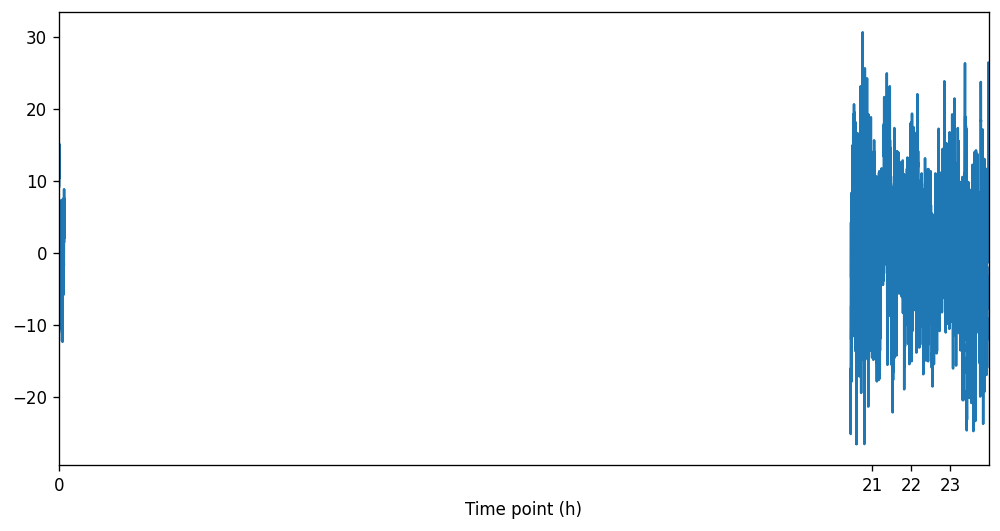

In [19]:
def data_plot(data, tp_label):
    fig = plt.figure(figsize=(10, 5), dpi=120)
    ax = fig.add_subplot(111)
    tp_time = np.arange(3600 * 24)
    tp_data = np.zeros(len(tp_time))
    tp_data[tp_label] = data.values
    tp_data[tp_data == 0] = np.nan
    ax.plot(tp_time, tp_data, )
    ax.set_xlabel('Time point (h)')
    ax.set_xlim((tp_label[0], tp_label[-1]))
    tp_xticks = [tp_i for tp_i in tp_label if tp_i % 3600 == 0]
    ax.set_xticks(tp_xticks)
    tp_xticklabels = [str(tp_ii // 3600) for tp_ii in tp_xticks]
    ax.set_xticklabels(tp_xticklabels)
    plt.show()

data_plot(essential_data_322['NacWdDir_float'], tp_xlabel_322)

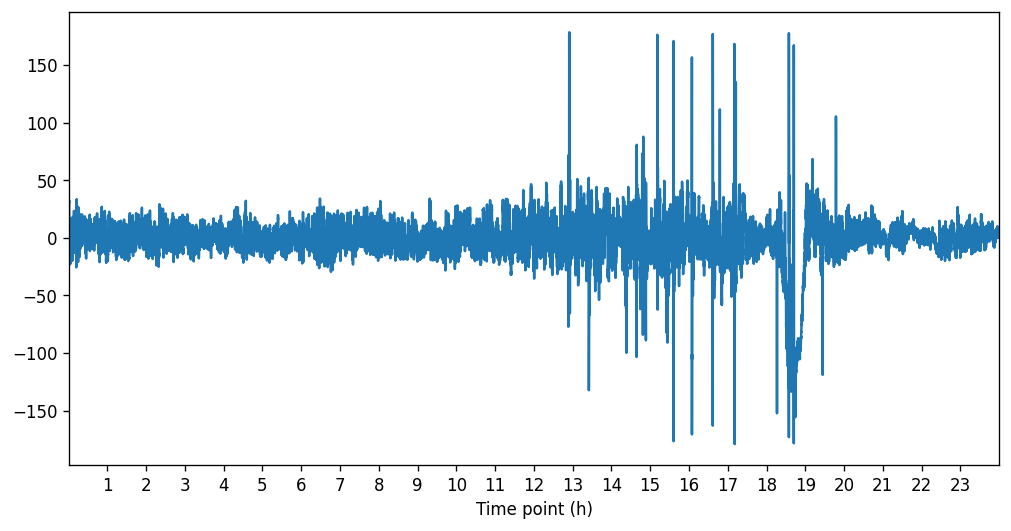

In [20]:
data_plot(essential_data_323['NacWdDir_float'], tp_xlabel_323)

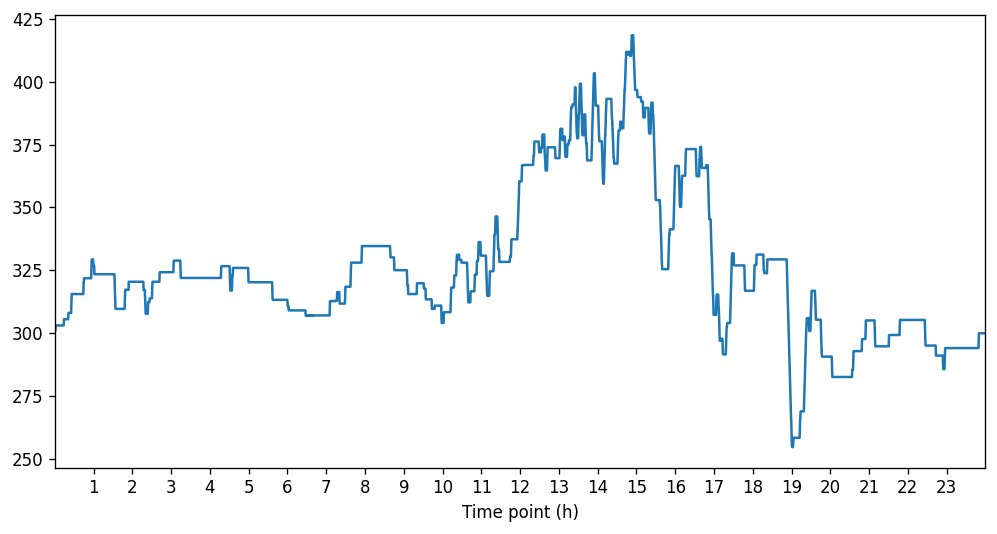

In [22]:
data_plot(essential_data_323['YawNacPos_float'], tp_xlabel_323)

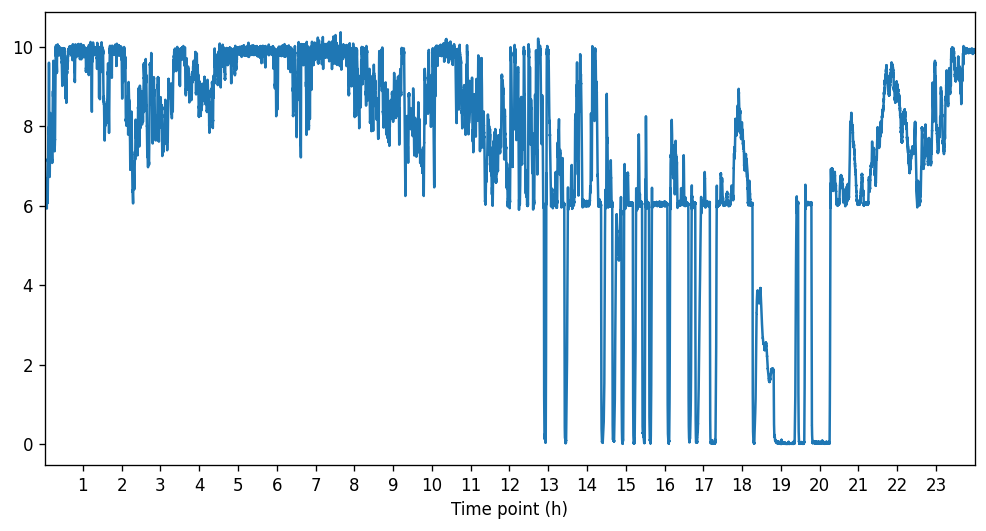

In [23]:
data_plot(essential_data_323['RotSpd_float'], tp_xlabel_323)

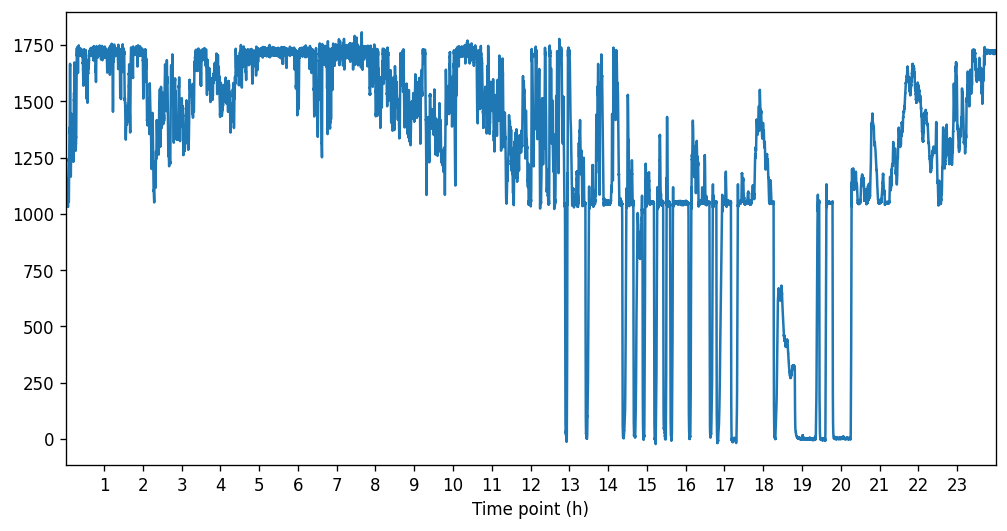

In [24]:
data_plot(essential_data_323['GenSpd_float'], tp_xlabel_323)

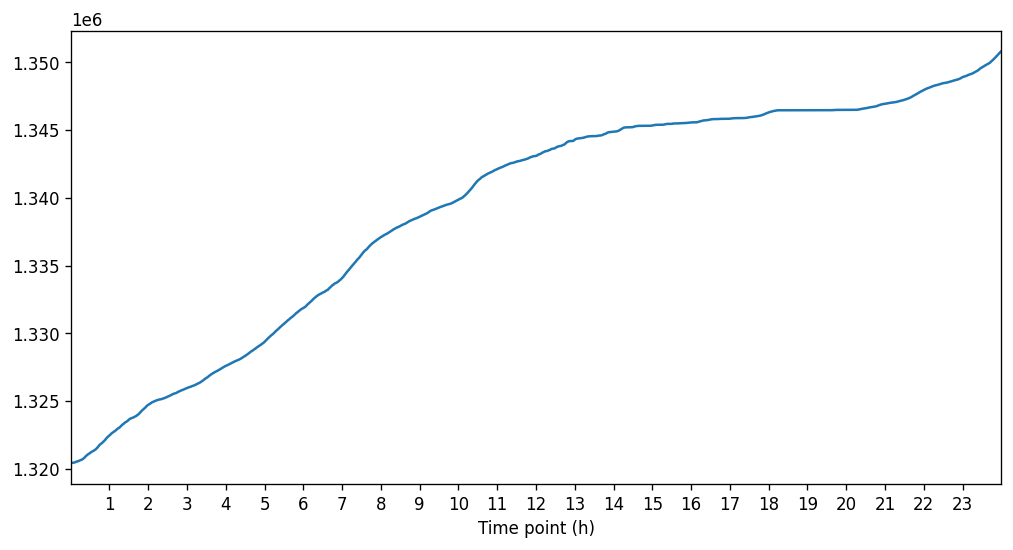

In [25]:
data_plot(essential_data_323['WecWh_int'], tp_xlabel_323)

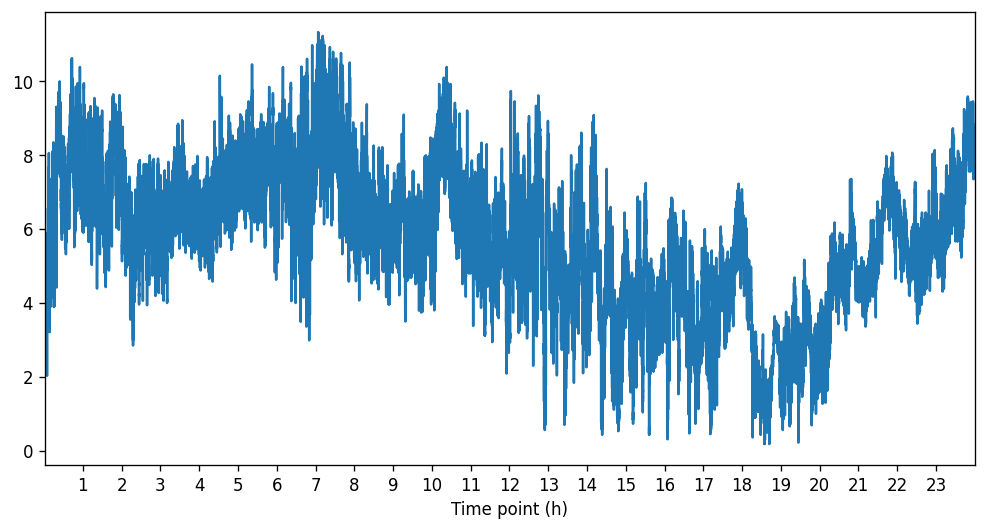

In [28]:
data_plot(essential_data_323['NacWdSpdFltS_float'], tp_xlabel_323)

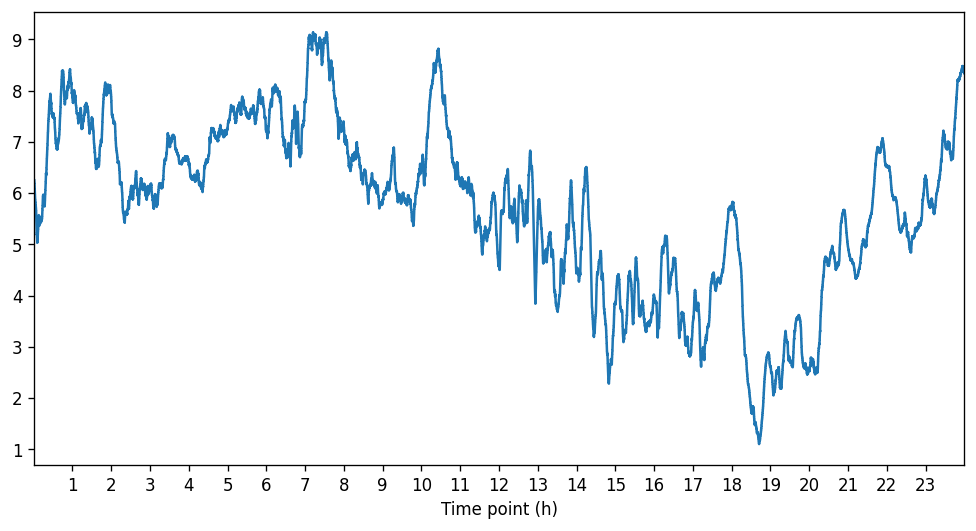

In [29]:
data_plot(essential_data_323['NacWdSpdFltL_float'], tp_xlabel_323)

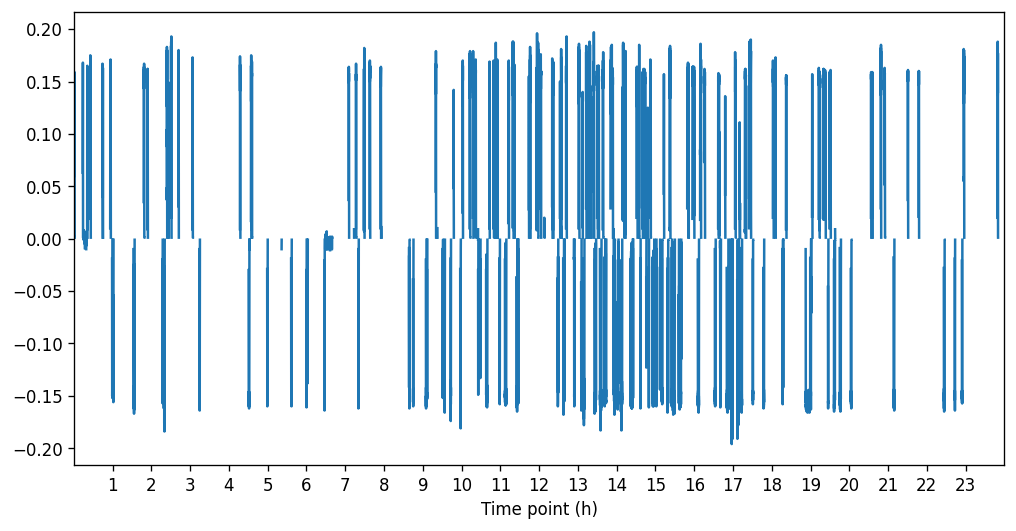

In [30]:
data_plot(essential_data_323['YawSpd_float'], tp_xlabel_323)

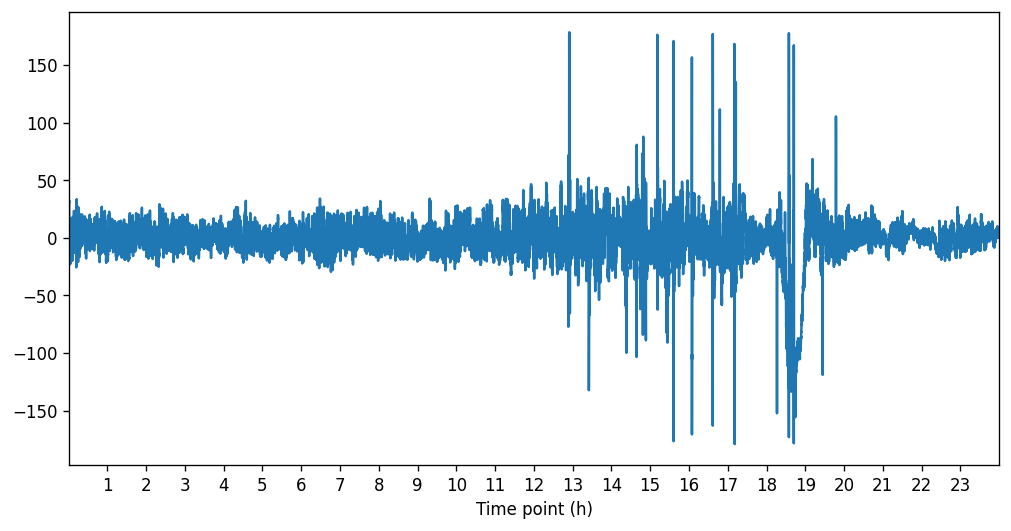

In [31]:
data_plot(essential_data_323['NacWdDir_float'], tp_xlabel_323)

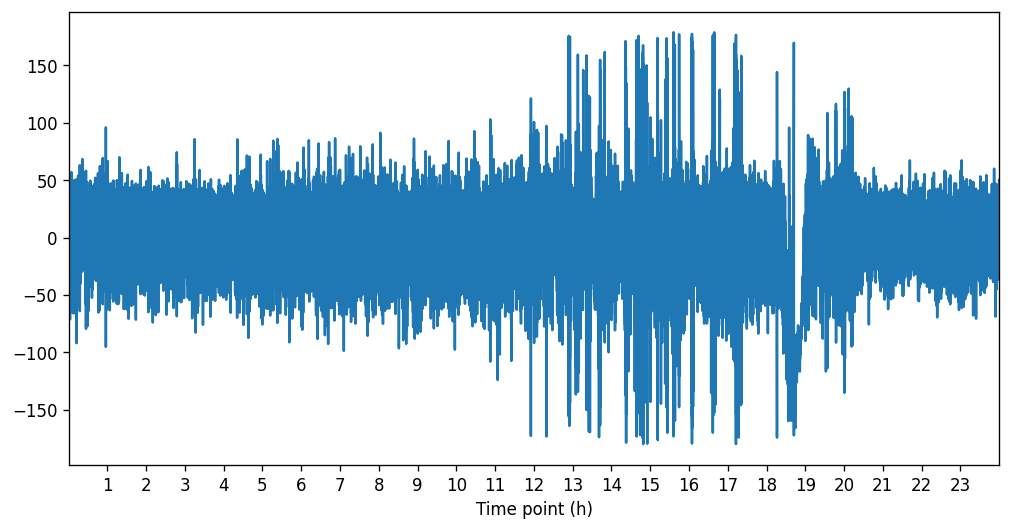

In [32]:
data_plot(essential_data_323['NacWdDir1_float'], tp_xlabel_323)

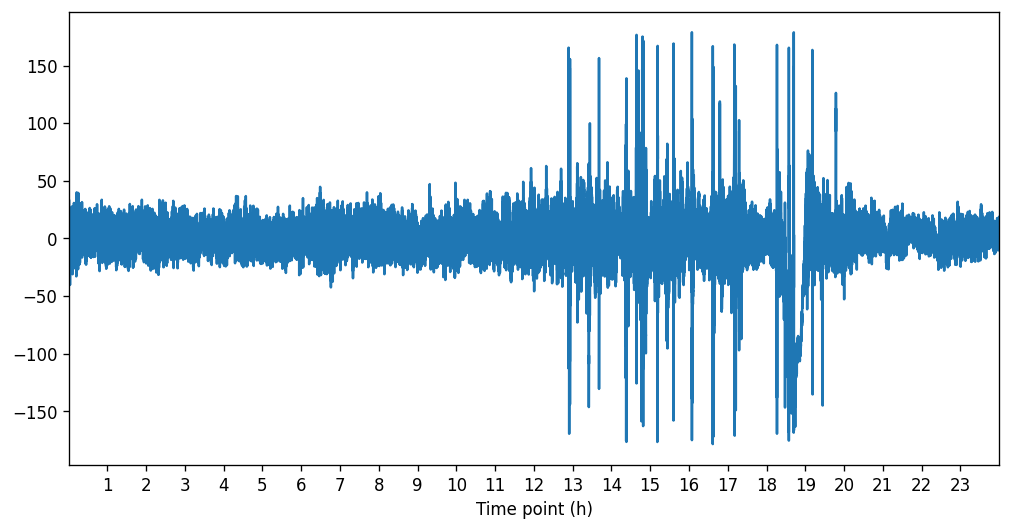

In [33]:
data_plot(essential_data_323['NacWdDir2_float'], tp_xlabel_323)